<a href="https://colab.research.google.com/github/LiaLiz2000/Machine-Learning/blob/main/Regresi%C3%B3n_Lineal_y_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejercicio, utilizaré el conjunto de datos de diabetes de Scikit-learn para aplicar una regresión
lineal utilizando Python.
 El objetivo es predecir el progreso de la enfermedad a partir de diversas variables
explicativas (o características) como la edad, sexo, índice de masa corporal (BMI), presión arterial
promedio, entre otras.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df  # Variables predictoras
y = diabetes.target  # Variable objetivo

# Mostrar las primeras filas del DataFrame
print(df.head())
print("\nValores objetivo (y):", y[:5])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Valores objetivo (y): [151.  75. 141. 206. 135.]


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

<Figure size 1200x1000 with 0 Axes>

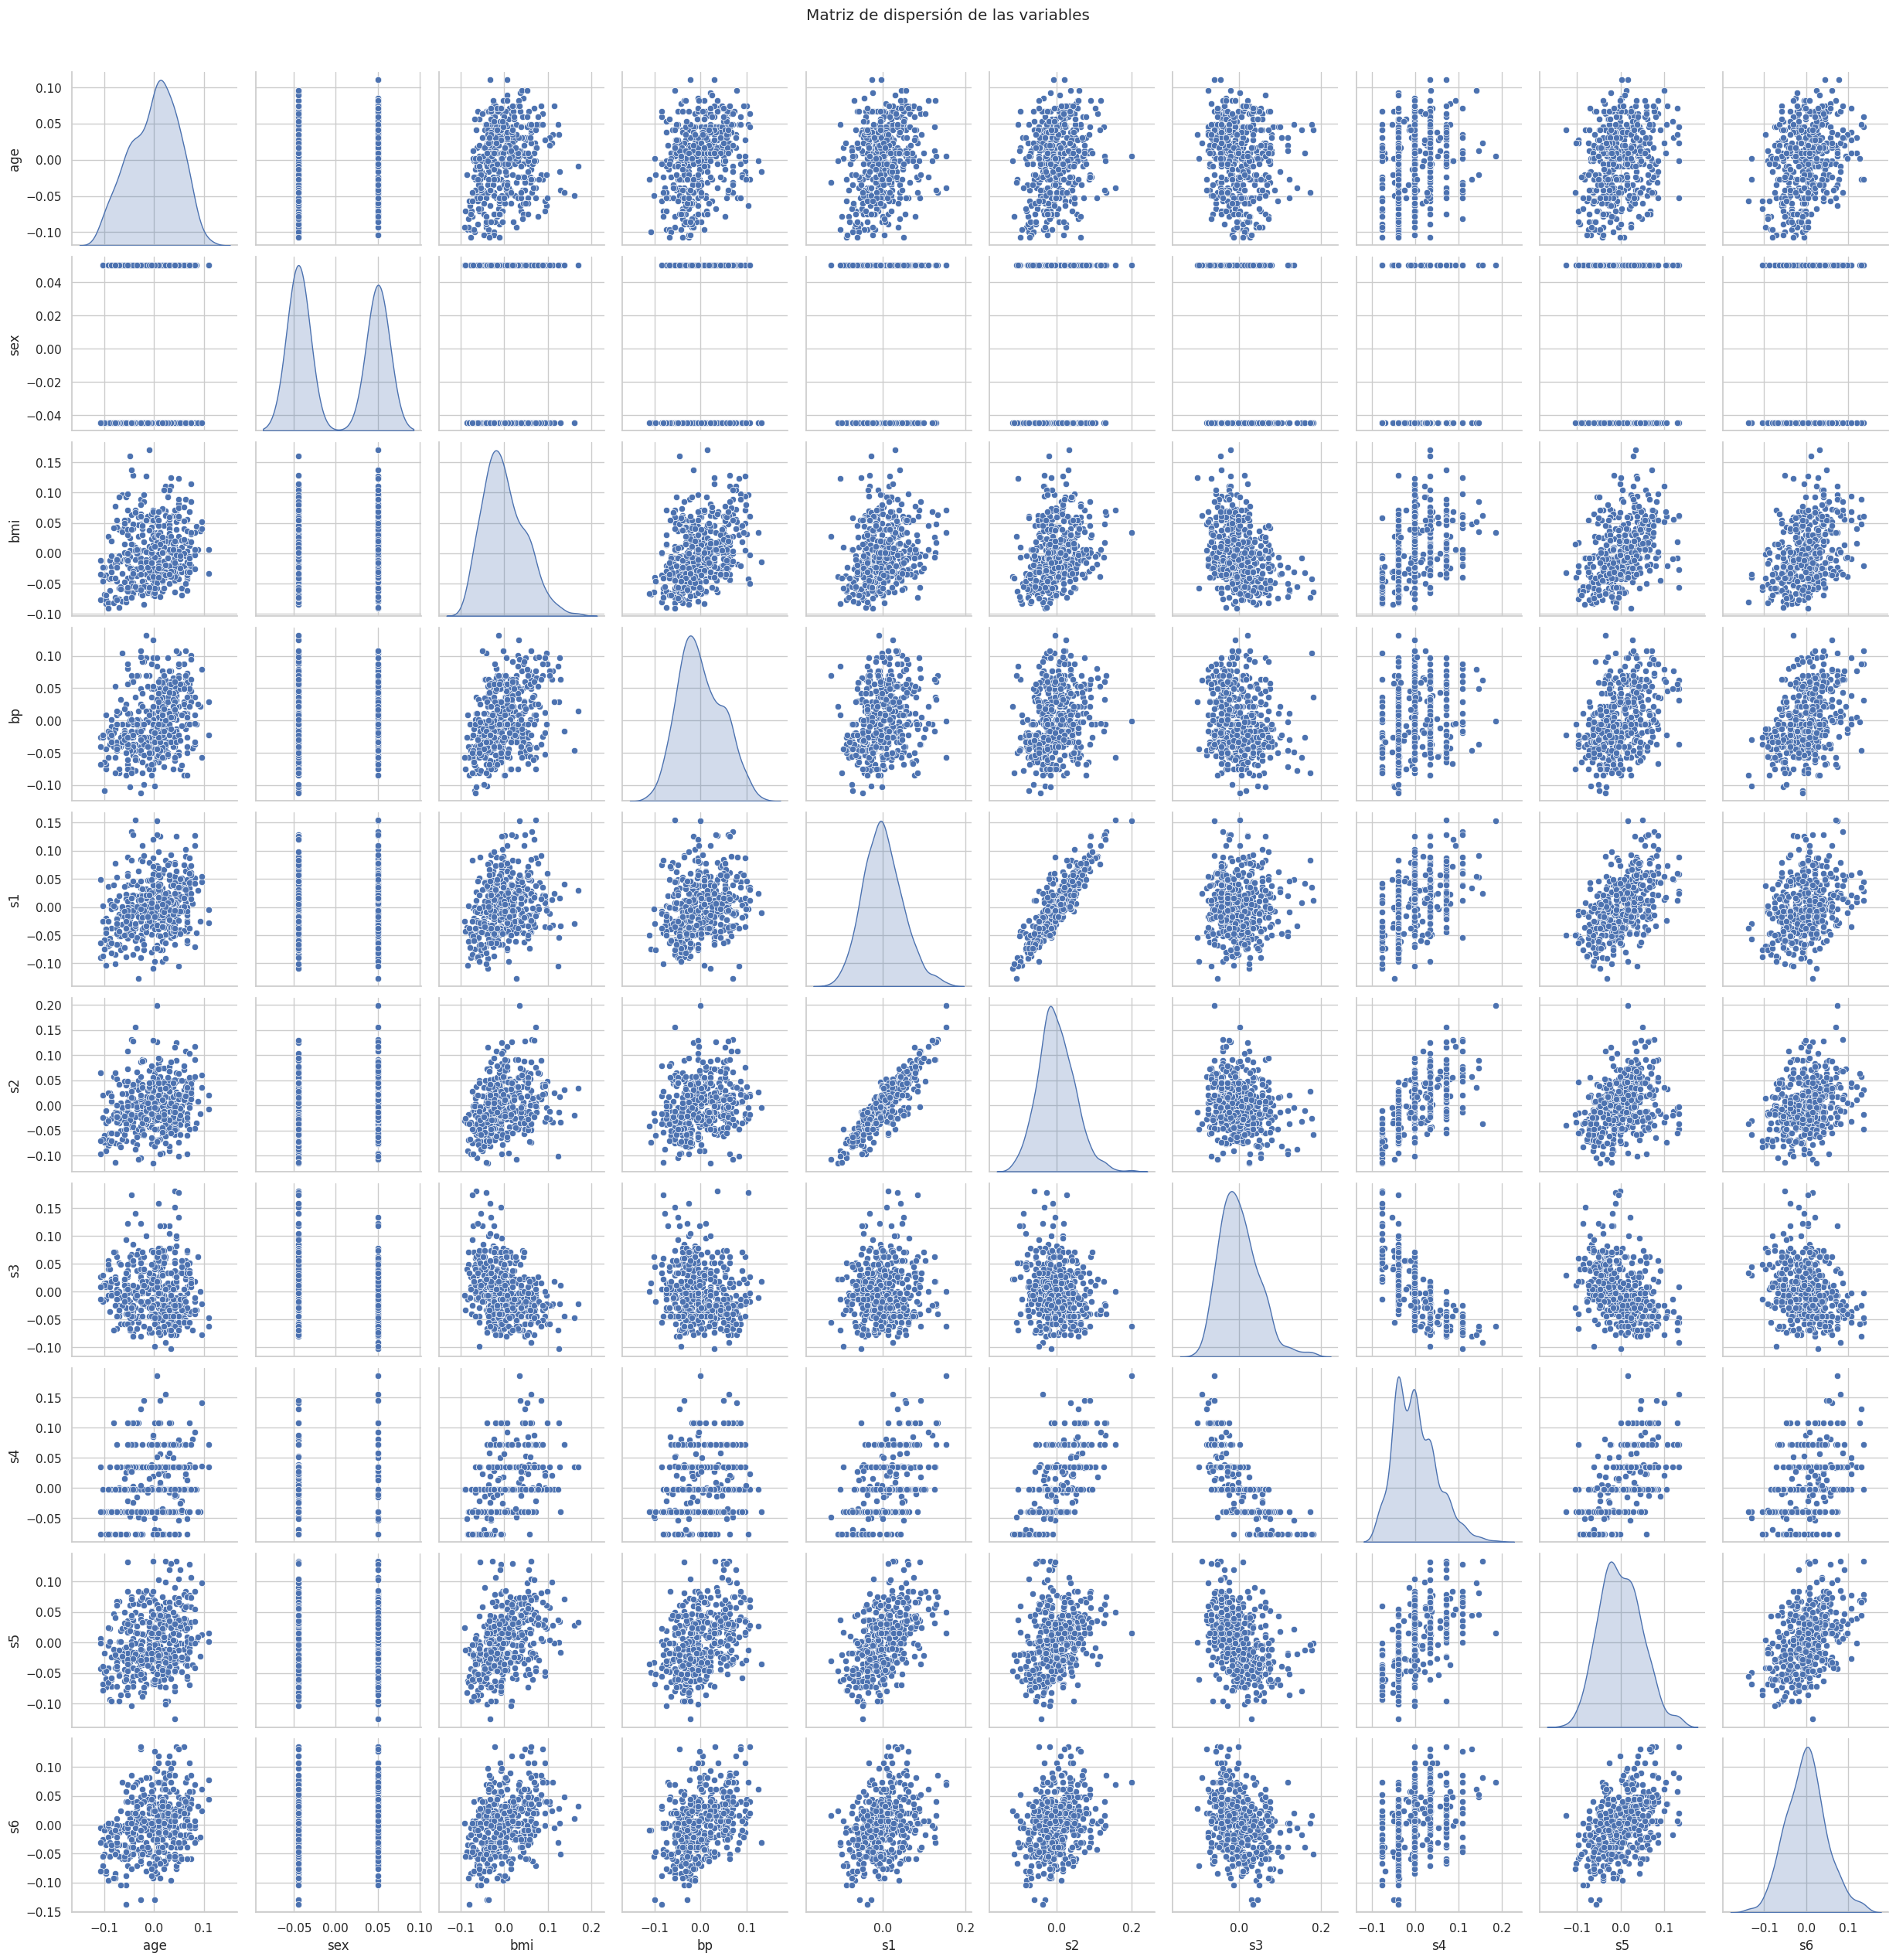

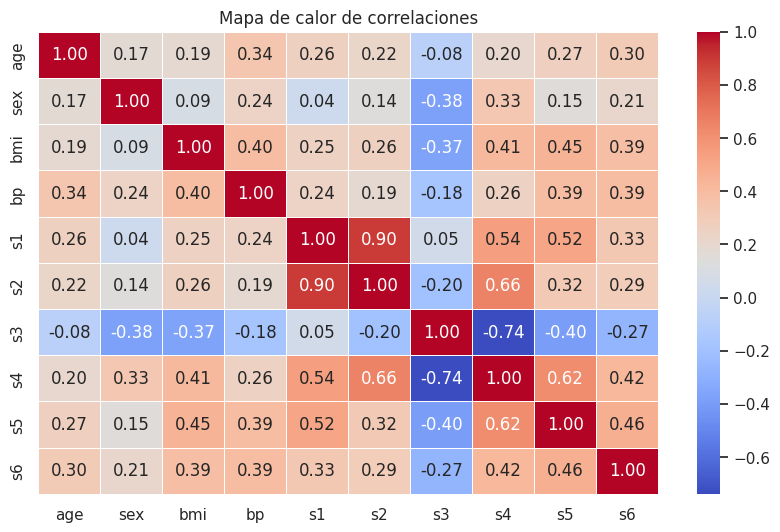

In [ ]:
#Resumen estadístico
print(df.describe())

#Matrices de disperción
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Matriz de dispersión
plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind="kde", markers="o")
plt.title("Matriz de dispersión de las variables", y=1.02)
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

Correlación entre BMI y target: 0.59


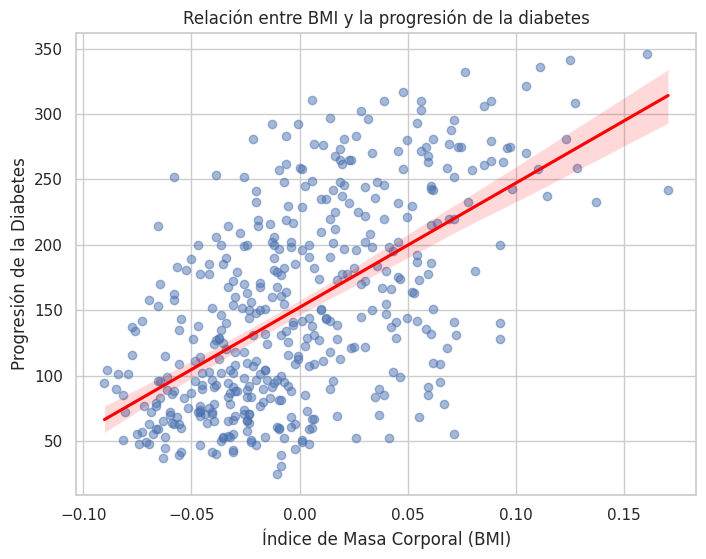

Coeficiente del modelo (pendiente): 944.1390
Intercepto del modelo: 149.78
Error cuadrático medio (MSE): 4111.98
Coeficiente de determinación (R²): 0.34


In [ ]:
#Bmi como variable explicativa
# Agregar la variable objetivo al DataFrame
df["target"] = diabetes.target

#correlacion
correlacion_bmi = df["bmi"].corr(df["target"])
print(f"Correlación entre BMI y target: {correlacion_bmi:.2f}")


plt.figure(figsize=(8, 6))
sns.regplot(x=df["bmi"], y=df["target"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Progresión de la Diabetes")
plt.title("Relación entre BMI y la progresión de la diabetes")
plt.show()

#divide el conjunto de datos
from sklearn.model_selection import train_test_split
X = df[["bmi"]]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

#modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#predicciones
y_pred = modelo.predict(X_test)


#evaluación del modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

print(f"Coeficiente del modelo (pendiente): {modelo.coef_[0]:.4f}")
print(f"Intercepto del modelo: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


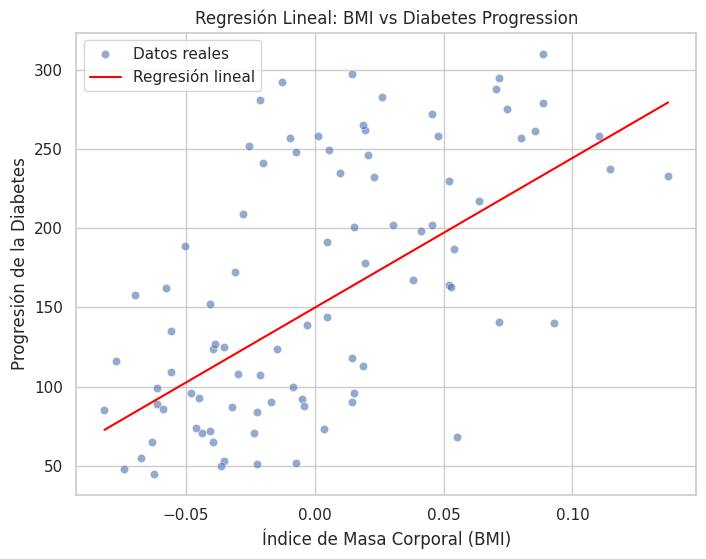

In [ ]:
#Visualizar la regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["bmi"], y=y_test, label="Datos reales", alpha=0.6)
sns.lineplot(x=X_test["bmi"], y=y_pred, color="red", label="Regresión lineal")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Progresión de la Diabetes")
plt.title("Regresión Lineal: BMI vs Diabetes Progression")
plt.legend()
plt.show()

Regresión Lineal Múltiple

In [ ]:
#divide el conjunto de datos
from sklearn.model_selection import train_test_split
X = df[['bmi','bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)


#entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#predicciones
y_pred = modelo.predict(X_test)


#evaluación del modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

print(f"Coeficiente del modelo (pendiente): {modelo.coef_[0]:.4f}")
print(f"Intercepto del modelo: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")



Coeficiente del modelo (pendiente): 549.1254
Intercepto del modelo: 149.80
Error cuadrático medio (MSE): 2867.77
Coeficiente de determinación (R²): 0.54


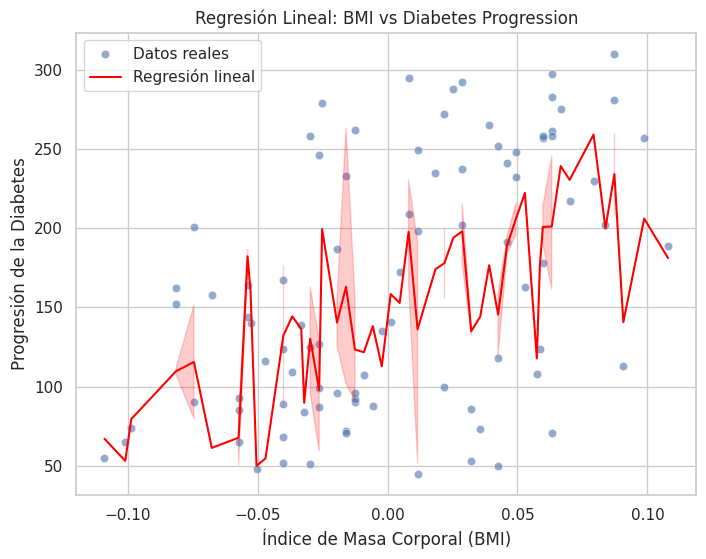

In [ ]:
#Visualizar la regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['bp'], y=y_test, label="Datos reales", alpha=0.6)
sns.lineplot(x=X_test['bp'], y=y_pred, color="red", label="Regresión lineal ")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Progresión de la Diabetes")
plt.title("Regresión Lineal: BP vs Diabetes Progression")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Regresión Lineal Manual (fórmula OLS)
# Agregar una columna de unos para el término de sesgo (intercepto)

X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Agrega una columna de unos

# Calcular los coeficientes manualmente con la ecuación OLS
beta_manual = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Hacer predicciones manualmente
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Agregar una columna de unos para las predicciones
y_pred_manual = X_b_test @ beta_manual

# Cargar los datos
X = df[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values  # Variables
y = df['target'].values  # Variable objetivo

# Regresión Lineal Simple (solo 'bmi')
X_simple = df[['bmi']].values
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

modelo_simple = LinearRegression()
modelo_simple.fit(X_train_simple, y_train)
y_pred_simple = modelo_simple.predict(X_test_simple)

# Regresión Lineal M
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train, y_train)
y_pred_multiple = modelo_multiple.predict(X_test)

#Comparación
# Error cuadrático medio (MSE)
mse_simple = mean_squared_error(y_test, y_pred_simple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
mse_manual = np.mean((y_pred_manual - y_test) ** 2)

# Coeficiente de determinación (R²)
r2_simple = r2_score(y_test, y_pred_simple)
r2_multiple = r2_score(y_test, y_pred_multiple)
r2_manual = r2_score(y_test, y_pred_manual)

# Resultados
print("Resultados Regresión Simple:")
print("Coeficiente:", modelo_simple.coef_[0])
print("Intercepto:", modelo_simple.intercept_)
print(f"MSE (Simple): {mse_simple:.2f}")
print(f"R² (Simple): {r2_simple:.2f}")
print("-" * 50)

print("Resultados Regresión Múltiple:")
print("Coeficientes:", modelo_multiple.coef_)
print("Intercepto:", modelo_multiple.intercept_)
print(f"MSE (Múltiple): {mse_multiple:.2f}")
print(f"R² (Múltiple): {r2_multiple:.2f}")
print("-" * 50)

print("Resultados Regresión Manual:")
print("Coeficientes Manuales:", beta_manual[1:])
print("Intercepto Manual:", beta_manual[0])
print(f"MSE (Manual): {mse_manual:.2f}")
print(f"R² (Manual): {r2_manual:.2f}")

Resultados Regresión Simple:
Coeficiente: 998.5776891375598
Intercepto: 152.00335421448167
MSE (Simple): 4061.83
R² (Simple): 0.23
--------------------------------------------------
Resultados Regresión Múltiple:
Coeficientes: [ 590.17539219  304.92093453 -885.13056896  511.34188458  195.04393062
  183.12469329  763.52329045   38.52519976]
Intercepto: 151.39563016464933
MSE (Múltiple): 2984.19
R² (Múltiple): 0.44
--------------------------------------------------
Resultados Regresión Manual:
Coeficientes Manuales: [ 557.80453727  268.42101324 -707.36989671  411.84422838  135.615571
  126.87933682  750.50449464   43.78183425]
Intercepto Manual: 152.1334841628959
MSE (Manual): 2880.22
R² (Manual): 0.46
